In [13]:
# libraries import 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

def import_excel(file_path):
    '''
    Use r berfore file path e,g. (r'path')
    or use double back slash \\
    '''
    df = pd.read_excel(file_path)
    print("file reading successfull")
    return df

def import_csv(file_path):
    '''
    Use r berfore file path e,g. (r'path')
    or use double back slash \\
    '''
    df = pd.read_csv(file_path)
    return df


def data_frame_info(df):
    if not isinstance(df, pd.DataFrame):
        raise ValueError("The input must be a pandas DataFrame.")
    '''
    Input : data farame variable name

    shape return shape of fata frame
    data_type returns data type of each column 
    summary gives statistical overview of data frame
    column_names return name of columns in data frame
    null_values and na_values return count of null and NA values in columns of data frame

    '''
    info = {
        'shape': df.shape,
        
        'data_types': df.dtypes,
        
        'summary': df.describe(),
        
        'column_names': df.columns.tolist(),
        
        'null_values': df.isnull().sum(),
        
        'na_values': df.isna().sum(),
        
        'duplicated_records': df.duplicated().sum()
    }
    
    return info

def print_info(df):
    if not isinstance(df, pd.DataFrame):
        raise ValueError("The input must be a pandas DataFrame.")
    info = data_frame_info(df)
    for key, value in info.items():
        print(key)
        print(value,'\n')


def remove_duplicates(df):
    df = df.drop_duplicates(keep='first')
    return df

def col(df):
    numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
    categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
    return numerical_columns , categorical_columns

def correlation_plot(df):
    num , cat = col(df)
    sns.heatmap(df[num].corr(), annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
    plt.title('Correlation Heatmap')
    plt.show()

def statistical_summary(df):
    '''Calculate statistics for each numerical column'''
    num , cat = col(df)
    stats_df = pd.DataFrame() 
    stats_df['Mean'] = df[num].mean()
    stats_df['Median'] = df[num].median()
    stats_df['Standard Deviation'] = df[num].std()
    stats_df['Kurtosis'] = df[num].kurtosis()
    stats_df['Skewness'] = df[num].skew()

    return stats_df


def displot(data=None, X=None, Y=None, HUE=None, KDE=False, COL=None):
    '''data = dataFrame
        x = column on x axis
        y = column on y axis (optional)
        hue = column name (optional)
        kde = If True, compute a kernel density estimate to smooth the distribution and show on the plot as (one or more) line(s).
        COL = plot segregation based on column
    '''
    
    pl = sns.displot(data, x=X, y=Y, hue=HUE, kde=KDE, col=COL)
    
    
    pl.set_axis_labels(X, Y)
    
   
    for ax in pl.axes.flat:
        ax.tick_params(axis='x', labelrotation=90)
    

    if COL:
        if X and Y:
            pl.figure.suptitle(f'Distribution of {X} & {Y}', fontsize=16)
        elif X:
            pl.figure.suptitle(f'Distribution of {X}', fontsize=16)
        elif Y:
            pl.figure.suptitle(f'Distribution of {Y}', fontsize=16)
    else:
        if X and Y:
            plt.title(f'Distribution of {X} & {Y}', fontsize=16)
        elif X:
            plt.title(f'Distribution of {X}', fontsize=16)
        elif Y:
            plt.title(f'Distribution of {Y}', fontsize=16)

  
    pl.figure.tight_layout()  
    pl.figure.subplots_adjust(top=0.8)

    plt.show()

def boxplt(df, X , Y=None , hue = None,ort='h'):
    num , cat = col(df)
    '''df = dataframe
        X = column_Name
        y = column_name(optional)
        hue = column_name(optional)
        ort = orientation h---> horizpntal , v ---> vertical (optional) '''
    sns.boxplot(data=df,x=X,y=Y,hue=hue,orient=ort)
    plt.title(f"box_plot for {X}")
    plt.show()


In [ ]:
# Load CSV File
df =import_csv('E:\PROJECTS\ml\loan_data.csv')

<>:2: SyntaxWarning: invalid escape sequence '\P'
<>:2: SyntaxWarning: invalid escape sequence '\P'
C:\Users\vmohi\AppData\Local\Temp\ipykernel_1200\3578985645.py:2: SyntaxWarning: invalid escape sequence '\P'
  df =import_csv('E:\PROJECTS\ml\loan_data.csv')


In [3]:
# Verfiy data 
df.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


In [4]:
print_info(df)

shape
(45000, 14) 

data_types
person_age                        float64
person_gender                      object
person_education                   object
person_income                     float64
person_emp_exp                      int64
person_home_ownership              object
loan_amnt                         float64
loan_intent                        object
loan_int_rate                     float64
loan_percent_income               float64
cb_person_cred_hist_length        float64
credit_score                        int64
previous_loan_defaults_on_file     object
loan_status                         int64
dtype: object 

summary
         person_age  person_income  person_emp_exp     loan_amnt  \
count  45000.000000   4.500000e+04    45000.000000  45000.000000   
mean      27.764178   8.031905e+04        5.410333   9583.157556   
std        6.045108   8.042250e+04        6.063532   6314.886691   
min       20.000000   8.000000e+03        0.000000    500.000000   
25%       24.0000

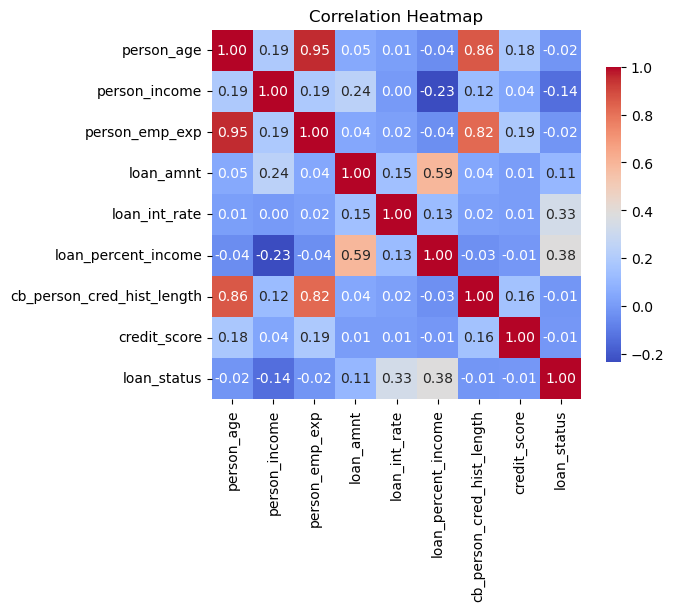

In [5]:
correlation_plot(df)

In [6]:
statistical_summary(df)

,Mean,Median,Standard Deviation,Kurtosis,Skewness
person_age,27.764178,26.00,6.045108,18.649449,2.548154
person_income,80319.053222,67048.00,80422.498632,2398.684769,34.137583
person_emp_exp,5.410333,4.00,6.063532,19.168324,2.594917
loan_amnt,9583.157556,8000.00,6314.886691,1.351215,1.179731
loan_int_rate,11.006606,11.01,2.978808,-0.420335,0.213784
loan_percent_income,0.139725,0.12,0.087212,1.082416,1.034512
cb_person_cred_hist_length,5.867489,4.00,3.879702,3.725945,1.631720
credit_score,632.608756,640.00,50.435865,0.203022,-0.610261
loan_status,0.222222,0.00,0.415744,-0.214176,1.336351


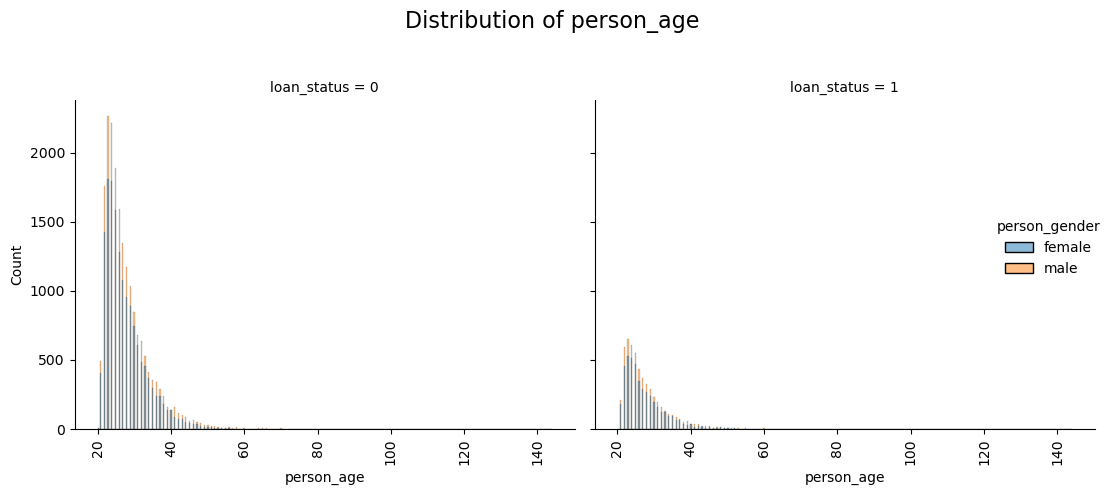

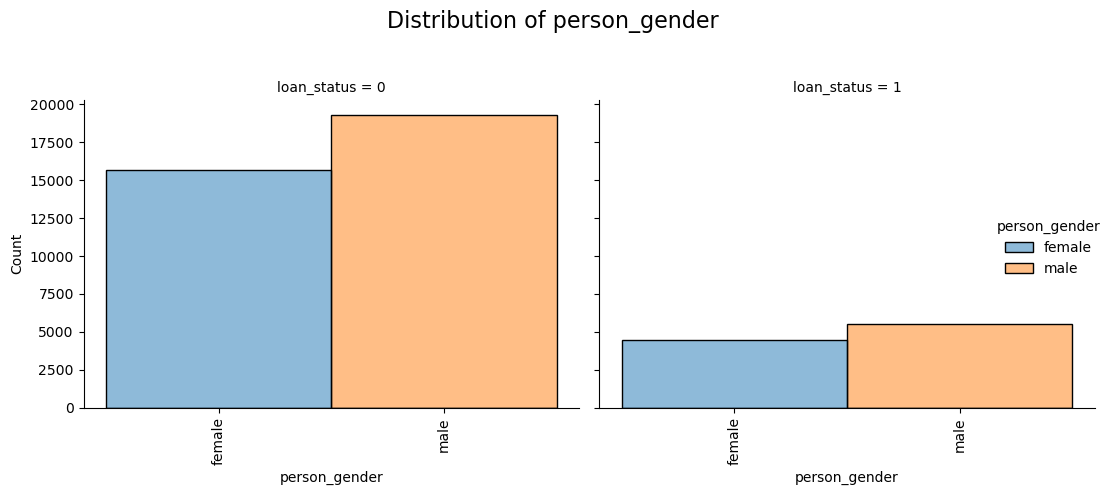

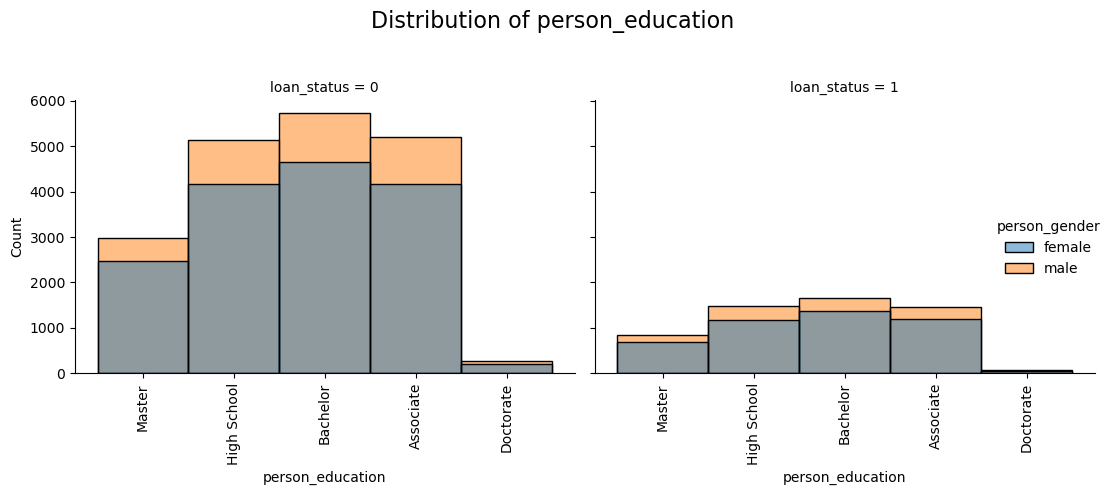

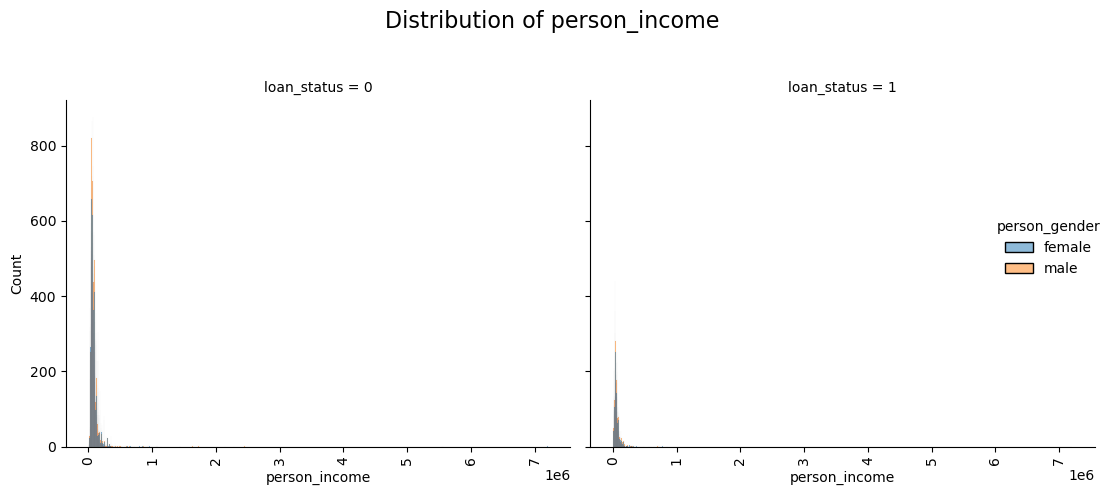

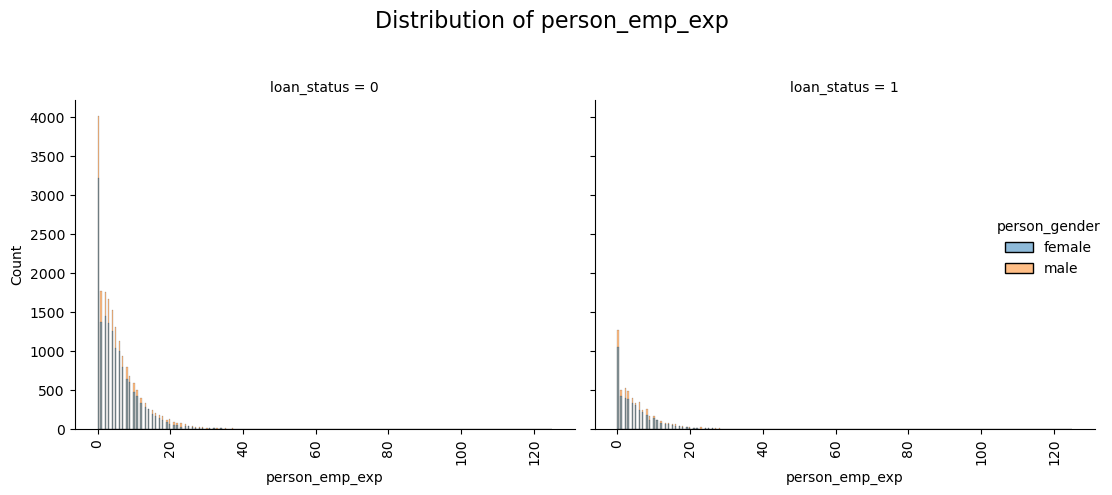

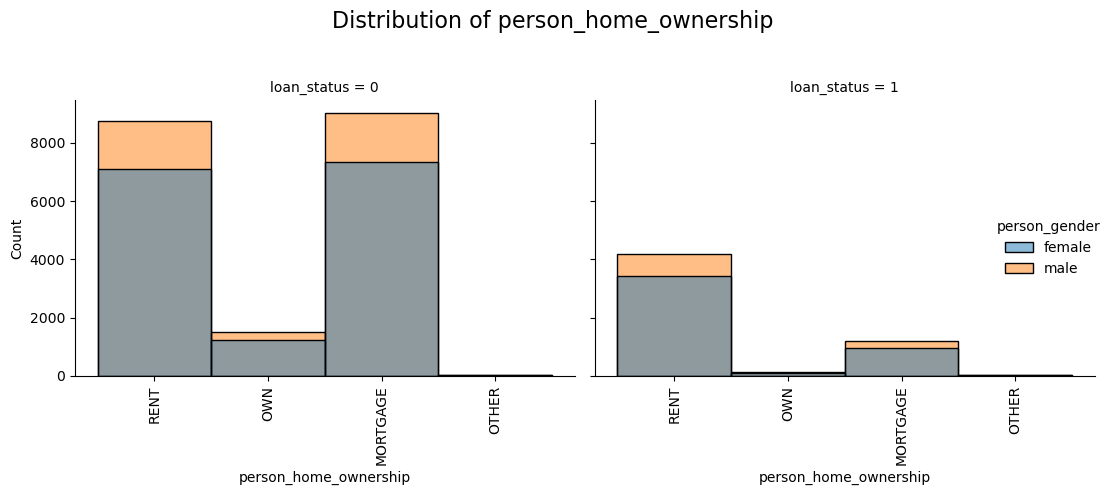

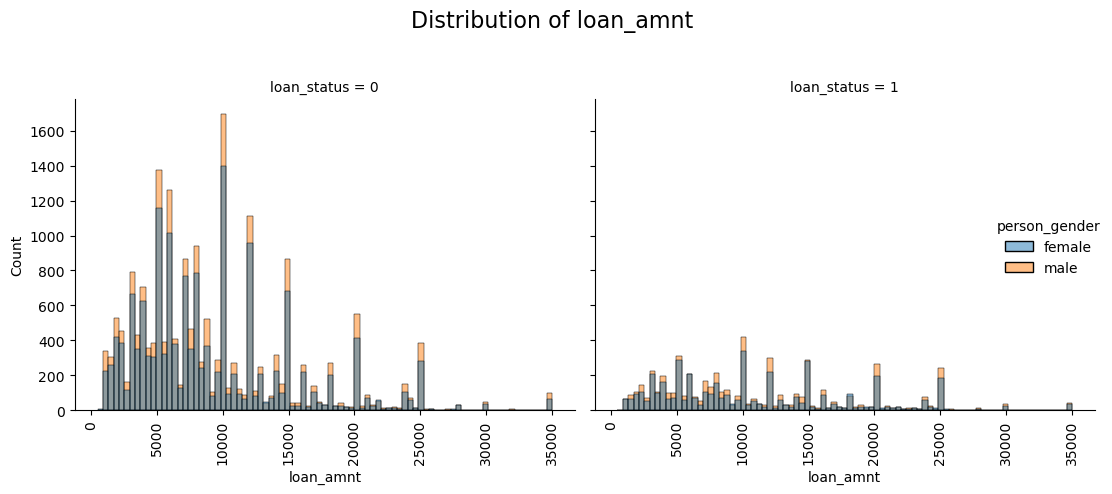

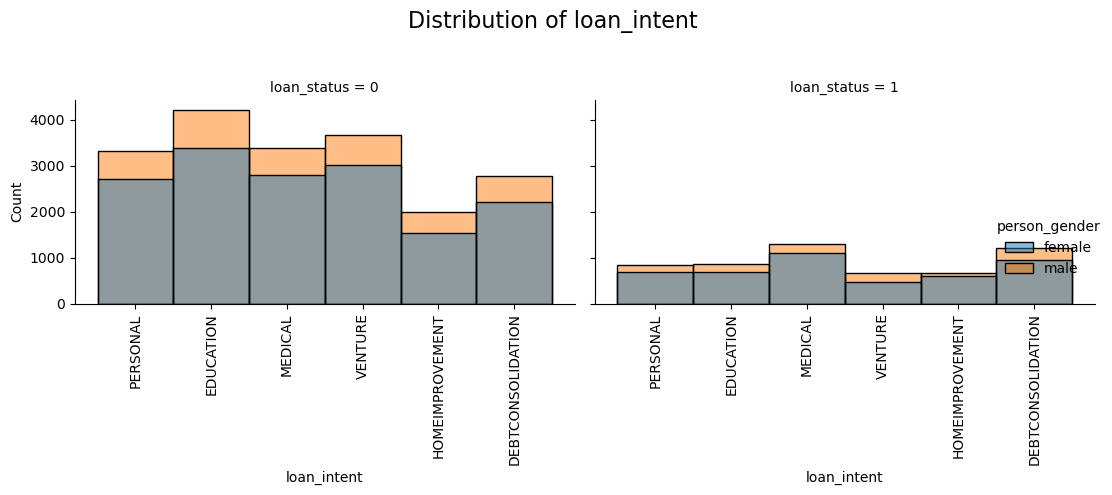

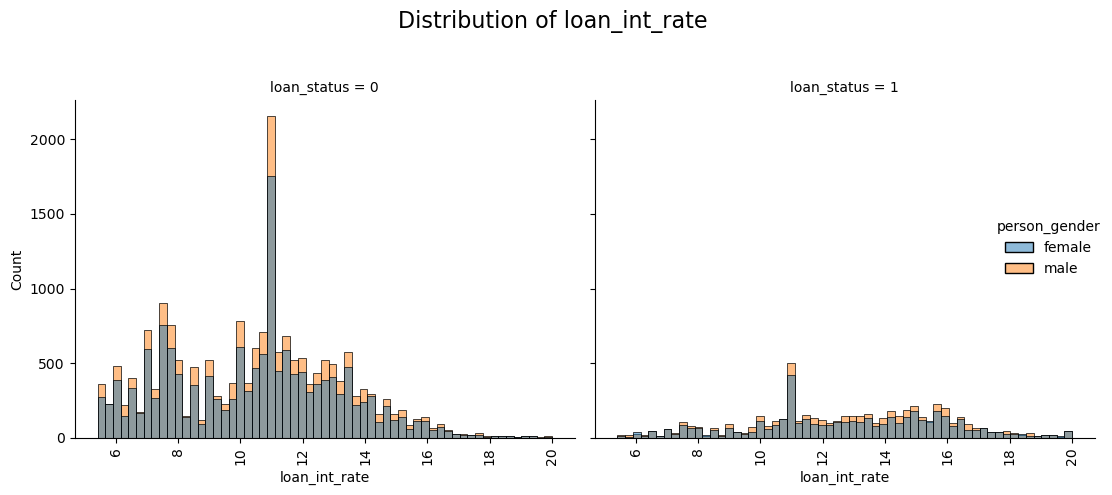

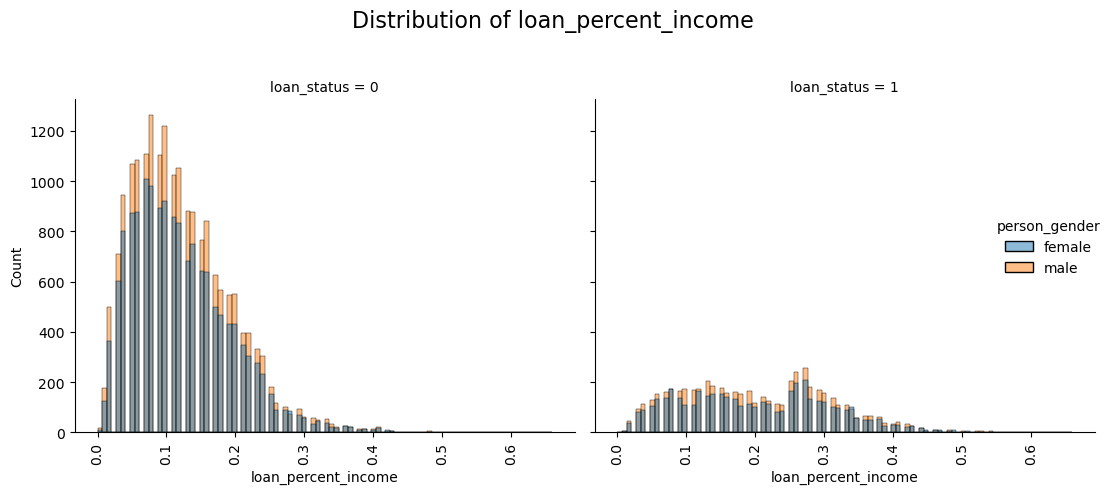

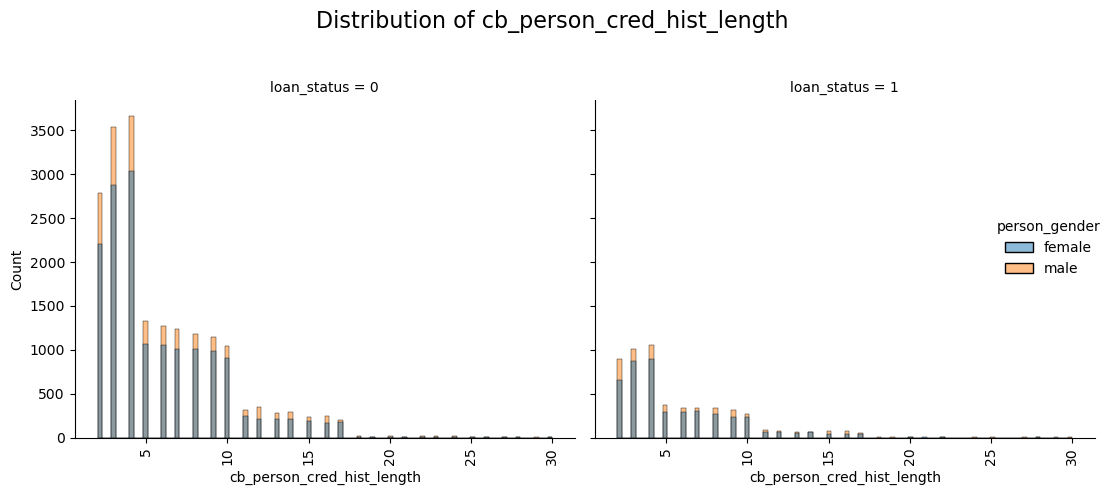

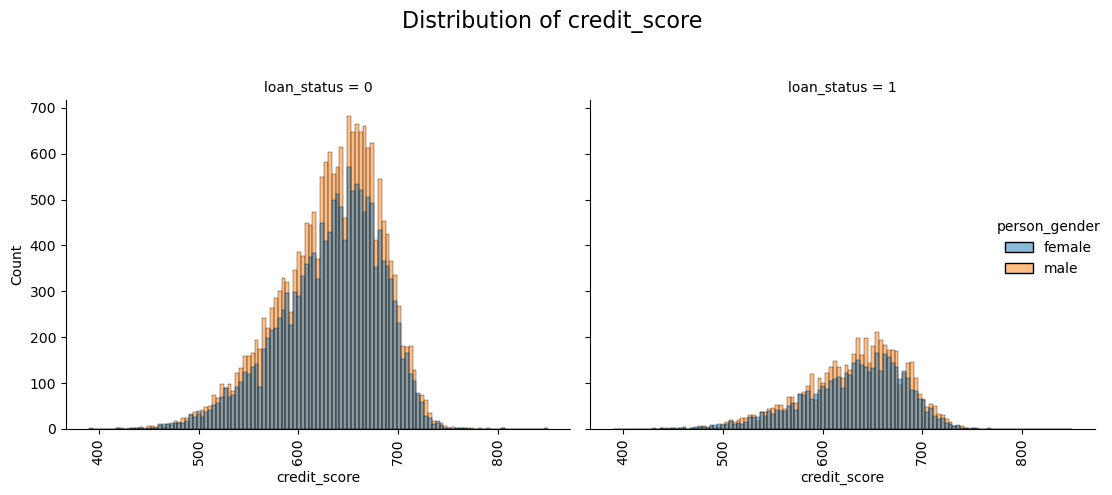

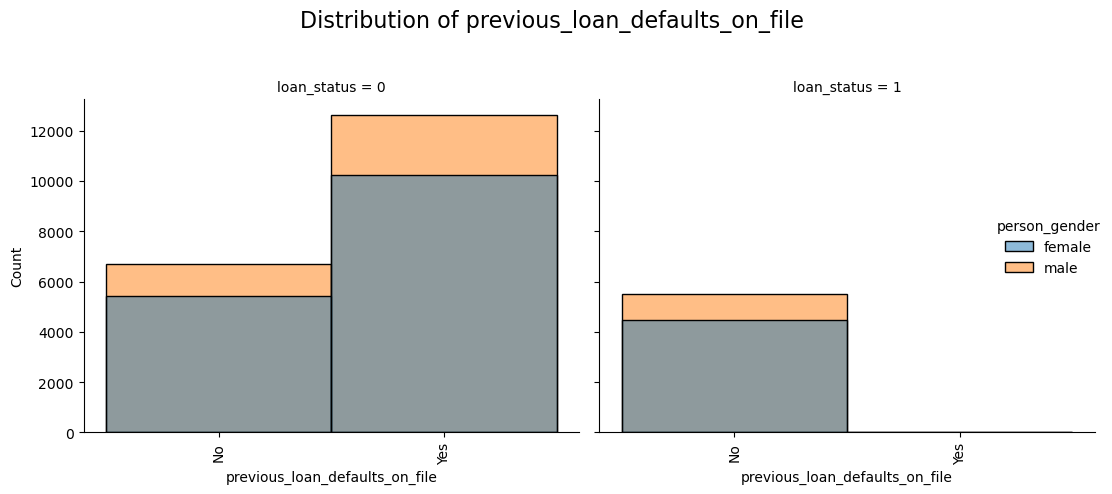

In [7]:
for i in df.columns[0:-1]:
    displot(data=df,X=i, Y=None, HUE='person_gender' ,KDE=False,COL='loan_status')

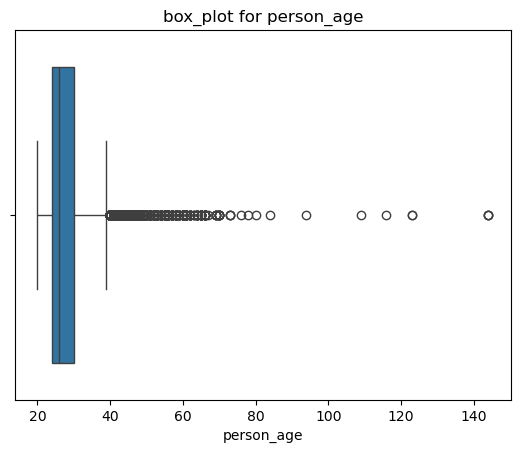

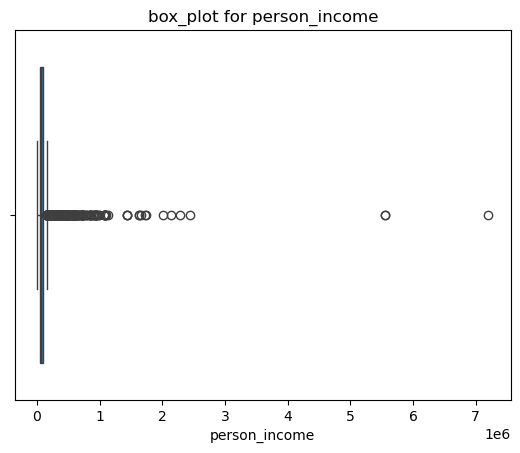

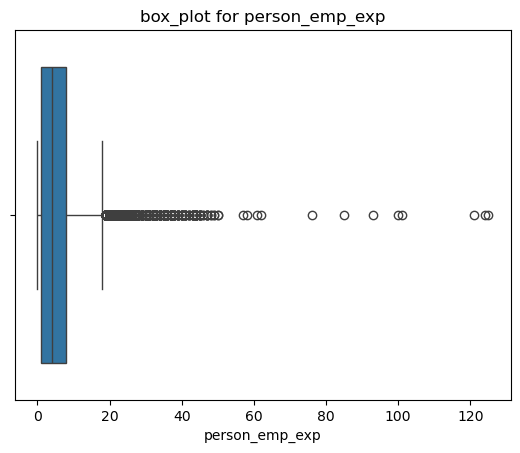

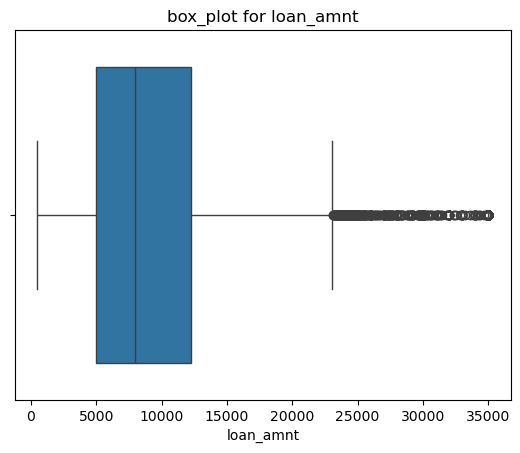

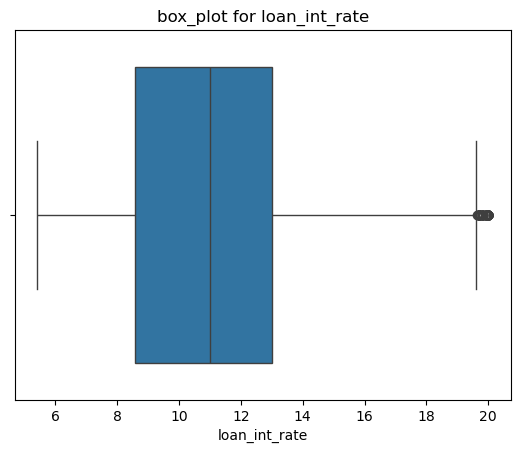

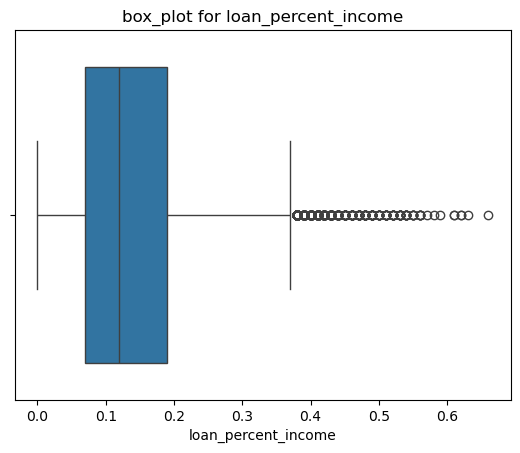

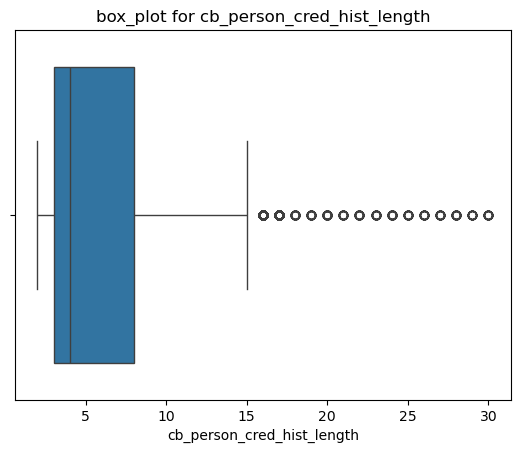

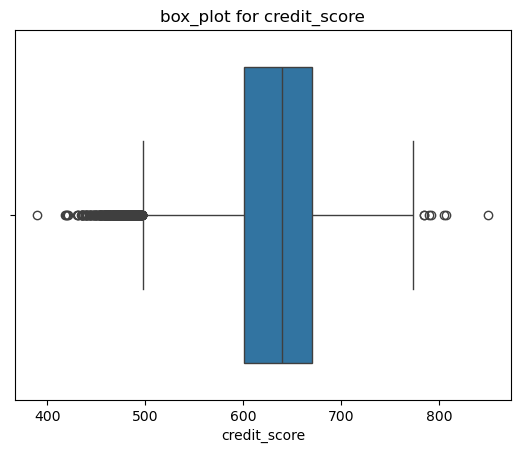

In [16]:
num , cat = col(df)

for i in num[:-1]:
    boxplt(df, X=i , Y=None , hue =None)